In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
df_list = []
for root, dirs, files in os.walk('/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/hyperparameter_training'):
    for name in files:
        file = "{}/{}".format(root,name)     
        if name.endswith(("csv")):
            d = pd.read_csv(file)
            d['lr'] = root.split(",lr=")[1].split("_")[0]
            d['actor_hiddens'] = root.split("actor_hiddens=")[1].split(",c")[0]
            d['critic_hiddens'] = root.split("critic_hiddens=")[1].split(",lr")[0]
            
            df_list.append(d)

training = pd.concat(df_list)
training.head()

training.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/interim/hyperparameter_training_all_data.csv")



In [14]:
training['lr'] = pd.to_numeric(training['lr'])

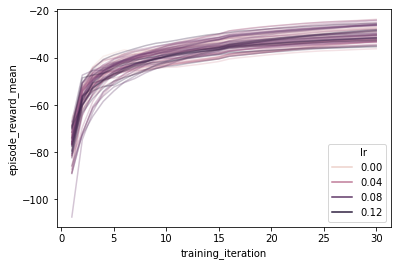

In [15]:
sns.lineplot(data=training, x="training_iteration", y='episode_reward_mean', hue="lr", alpha=0.3)


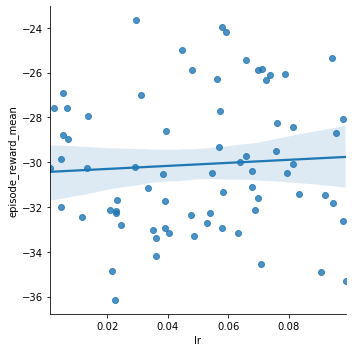

In [16]:
sns.lmplot(data=training[training.training_iteration==30], x="lr", y="episode_reward_mean")

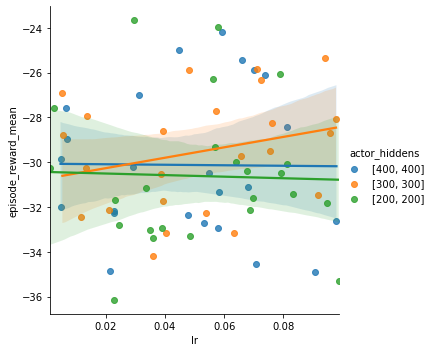

In [17]:
sns.lmplot(data=training[training.training_iteration==30], x="lr", y="episode_reward_mean", hue="actor_hiddens")

In [18]:
training.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/interim/hyperparameter_training.csv")

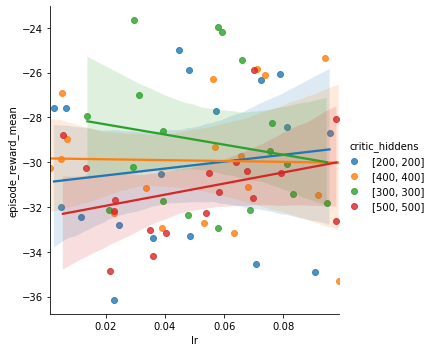

In [19]:
sns.lmplot(data=training[training.training_iteration==30], x="lr", y="episode_reward_mean", hue="critic_hiddens")

In [20]:
table_full = training[training.training_iteration==30][['episode_reward_mean', "lr","actor_hiddens","critic_hiddens"]].sort_values("episode_reward_mean", ascending=False)
table_full = table_full.reset_index().drop(columns="index")
table_full

,episode_reward_mean,lr,actor_hiddens,critic_hiddens
0,-23.666372,0.029698,"[200, 200]","[300, 300]"
1,-23.945660,0.057742,"[200, 200]","[300, 300]"
2,-24.201690,0.059215,"[400, 400]","[300, 300]"
3,-24.974671,0.044814,"[400, 400]","[200, 200]"
4,-25.343361,0.094144,"[300, 300]","[400, 400]"
...,...,...,...,...
67,-34.536298,0.070872,"[400, 400]","[200, 200]"
68,-34.844292,0.021564,"[400, 400]","[500, 500]"
69,-34.899025,0.090548,"[400, 400]","[200, 200]"
70,-35.293897,0.098661,"[200, 200]","[400, 400]"


In [25]:
table_reduced = table_full.head(8).append(table_full.tail(8))
table_reduced = table_reduced.reset_index()
table_reduced['index'] = table_reduced['index']+1
table_reduced = table_reduced.round(4)
table_reduced = table_reduced[['index','lr','actor_hiddens','critic_hiddens','episode_reward_mean']]
table_reduced

,index,lr,actor_hiddens,critic_hiddens,episode_reward_mean
0,1,0.0297,"[200, 200]","[300, 300]",-23.6664
1,2,0.0577,"[200, 200]","[300, 300]",-23.9457
2,3,0.0592,"[400, 400]","[300, 300]",-24.2017
3,4,0.0448,"[400, 400]","[200, 200]",-24.9747
4,5,0.0941,"[300, 300]","[400, 400]",-25.3434
5,6,0.0659,"[400, 400]","[300, 300]",-25.4411
6,7,0.0712,"[300, 300]","[400, 400]",-25.8312
7,8,0.0699,"[400, 400]","[500, 500]",-25.8656
8,65,0.0486,"[200, 200]","[200, 200]",-33.3017
9,66,0.0360,"[200, 200]","[200, 200]",-33.3643


In [26]:
table_reduced_named = table_reduced.rename(columns={"episode_reward_mean":"Mean episode reward", "actor_hiddens":"Actor hiddens", "critic_hiddens":"Critic hiddens","index":"Rank", "lr":"LR"}).set_index("Rank")
table_reduced_named.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/processed/hyperparameter_tuning.csv")